<br>

<br>
<p> </p>
<center>
# How to apply a cleaning file
</center>
***

In [1]:
# This cell is just used to record the date of this tutorial and is not part of the tutorial.
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 26 June, 2019


## Outline:

This guide will demonstrate how to use the `apply_cleaning()` and `apply_cleaning_windographer()` functions to clean data using pre-existing file which denote the cleaning to be applied. The tutorial includes the following steps:

**1. `apply_cleaning()` with a simple csv:**

- import the brightwind library and some sample data 
- plot monthly means of raw wind speed
- apply cleaning to data based on a pre-existing .csv cleaning file:
- plot monthly means of cleaned wind speed
- overview of cleaning file structure

**2. `apply_cleaning_windographer()` with a windographer file:**

- import some sample data
- plot monthly means of raw wind speed
- apply cleaning to data based on a pre-existing windographer cleaning file:
- plot monthly means of cleaned wind speed


***

## 1. `apply_cleaning()` with a simple csv:


### Import the brightwind library and some sample data:

In [2]:
import brightwind as bw

In [3]:
# specify location of existing sample dataset
data_file_path = r'C:\..\brightwind\datasets\demo\demo_data.csv'

# load data as dataframe
data = bw.load_csv(data_file_path)

# show first few rows of dataframe
data.head(5) 

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


### Plot monthly means of raw data:

In [4]:
# create list of columns which include anemometer wind speed data
anemometers = ['Spd80mN', 'Spd80mS', 'Spd60mN', 'Spd60mS', 'Spd40mN', 'Spd40mS']

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


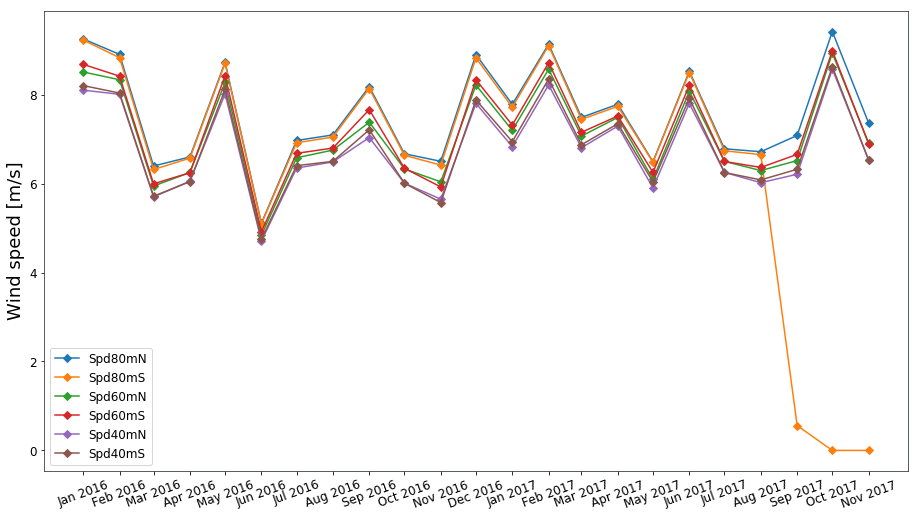

In [5]:
# plot monthly means of wind speed for each anemometer  
bw.monthly_means(data[anemometers])

Note the spurious 'Spd80mS' monthly mean values which can be seen for the last few months. 

### Apply cleaning to data based on a pre-existing cleaning file:

In [6]:
# specify location of associated cleaning file
cleaning_file_path = r'C:\..\demo_cleaning_file.csv'

# apply cleaning
clean_data = bw.apply_cleaning(data, cleaning_file_path)

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)


### Plot monthly means of cleaned wind speed:

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


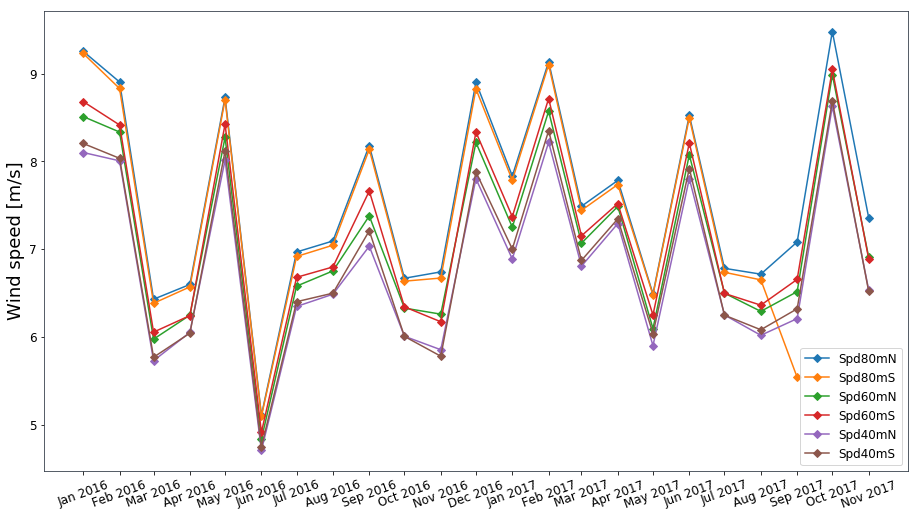

In [7]:
# plot monthly means of wind speed for each anemometer  
bw.monthly_means(clean_data[anemometers])

Note that the spurious 'Spd80mS' values have been removed.

### Overview of cleaning file structure:

In [8]:
# load cleaning file
cleaning_file = bw.load_cleaning_file(cleaning_file_path)

# show cleaning file
cleaning_file

,Sensor,Start,Stop,Reason
0,All,2016-01-09 15:30:00,2016-01-09 17:10:00,Installation
1,Spd,2016-03-09 06:20:00,2016-03-09 10:30:00,Icing
2,Dir,2016-03-09 06:20:00,2016-03-09 10:30:00,Icing
3,Spd,2016-03-29 23:50:00,2016-03-30 07:10:00,Icing
4,Dir,2016-03-29 23:50:00,2016-03-30 07:10:00,Icing
5,Spd,2016-11-08 02:30:00,2016-11-08 10:50:00,Icing
6,Dir,2016-11-08 02:30:00,2016-11-08 10:50:00,Icing
7,Spd,2016-11-18 15:50:00,2016-11-19 10:30:00,Icing
8,Dir,2016-11-18 15:50:00,2016-11-19 10:30:00,Icing
9,Spd,2016-11-20 16:40:00,2016-11-21 12:40:00,Icing


- Each row of the cleaning file relates to a portion of the time series which has been flagged for quality reasons.


- The 'Sensor' column specifies which variables are affected by the issue.
    * The function looks for all column names in your data that contain the sensor name. Therefore, when the sensor name is just 'Spd' it will find ALL column names that contain 'Spd' and clean out the data.
    * The sensor name 'All' is a special name which cleans ALL the data for that period.


- The 'Start' and 'Stop' dates specify the length the time period to be removed. The flagged data is inclusive of the 'start' time, and ends before the 'stop' time.

- The 'Reason' field justifies why the data should be removed.

***

## 2. `apply_cleaning_windographer()` with a windographer file:

### Import some sample data:

In [10]:
# specify location of existing sample dataset
campbell_data_file_path = r'C:\..\brightwind\datasets\demo\campbell_scientific_demo_data.csv'

# load data as dataframe
campbell_data = bw.load_campbell_scientific(campbell_data_file_path)

# show first few rows of dataframe
campbell_data.head(5) 

,RECORD,Site,LoggerID,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,0,demo_mast,7000,8.370,7.911,8.160,7.849,7.857,7.626,1.240,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,1,demo_mast,7000,8.250,7.961,8.100,7.884,7.952,7.840,0.897,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,2,demo_mast,7000,7.652,7.545,7.671,7.551,7.531,7.457,0.756,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,3,demo_mast,7000,7.382,7.325,6.818,6.689,6.252,6.174,0.844,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,4,demo_mast,7000,7.977,7.791,8.110,7.915,8.140,7.974,0.556,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


### Plot monthly means of raw wind speed:

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


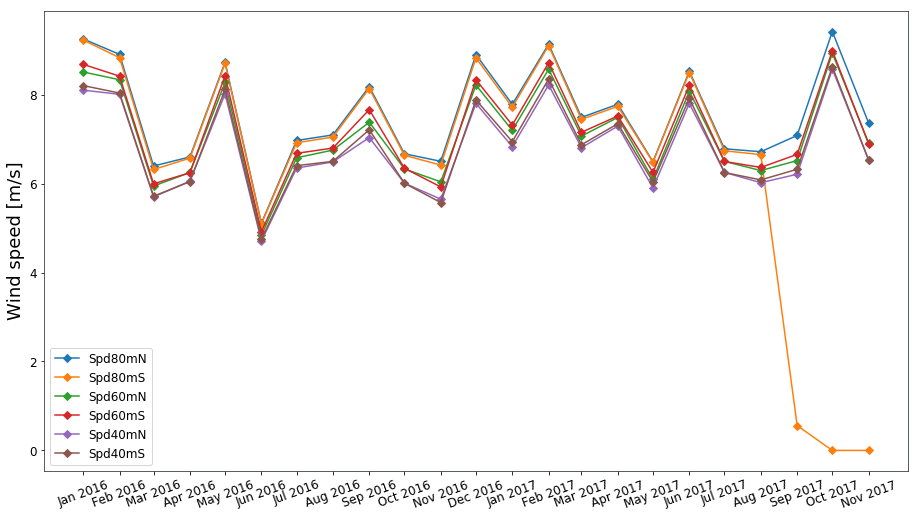

In [11]:
# plot monthly means of wind speed for each anemometer  
bw.monthly_means(campbell_data[anemometers])

You can see here that the data is the same as example 1, just loaded in a different format.

### Apply cleaning to data based on a pre-existing windographer cleaning file:

In [12]:
# specify location of associated cleaning file
windog_log_file_path = r'C:\..\brightwind\datasets\demo\windographer_flagging_log.txt'

# apply cleaning
campbell_data_clean = bw.apply_cleaning_windographer(campbell_data, windog_log_file_path)

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)


### Plot monthly means of cleaned wind speed:

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


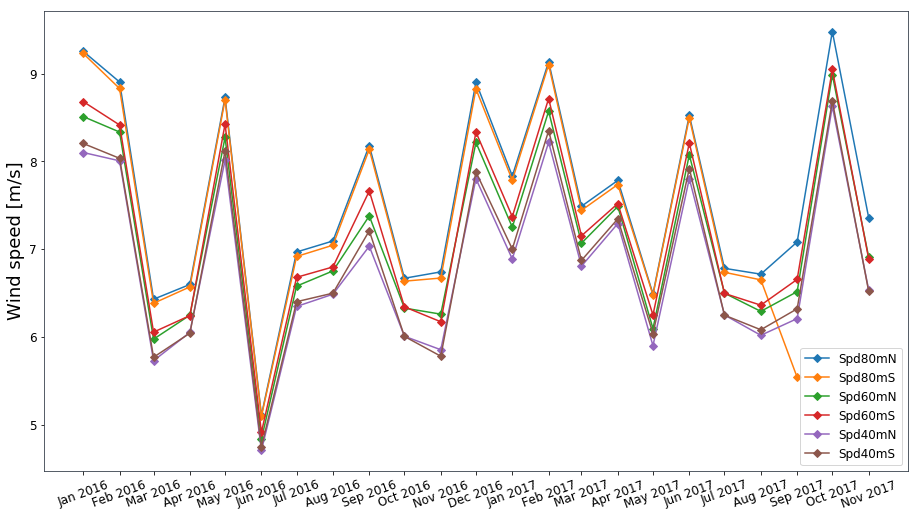

In [13]:
# plot monthly means of wind speed for each anemometer  
bw.monthly_means(campbell_data_clean[anemometers])

As with example 1, the spurious data has been removed.

***
